# Analysis Questionnaire

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st

## Preprocessing

In [33]:
# Experimental data containing the number of MW episodes
mw_episodes = pd.read_csv("./../MW_episodes_raw.csv", delimiter=';')

# Assign bins to the number of MW episodes in each block that corresponds to questionnaire categories
def binning(values):
    bins = []
    for value in values:
        if value == 0:
            bins.append(0)
        elif value <= 5:
            bins.append(1)
        elif value <= 10:
            bins.append(2)
        elif value <= 15:
            bins.append(3)
        elif value <= 20:
            bins.append(4)
        else:
            bins.append(5)
    return pd.Series(bins)

mw_episodes['Bin1'] = binning(mw_episodes['Block1'])
mw_episodes['Bin2'] = binning(mw_episodes['Block2'])
mw_episodes['Bin3'] = binning(mw_episodes['Block3'])

mw_episodes.head()

,Subject,Block1,Block2,Block3,Total,Bin1,Bin2,Bin3
0,sub1,1,3,11,15,1,1,3
1,sub2,19,22,23,64,4,5,5
2,sub3,6,12,10,28,2,3,2
3,sub4,4,10,8,22,1,2,2
4,sub5,8,6,12,26,2,2,3


In [34]:
# Questionnaire data
survey = pd.read_csv("./../QuestionnaireMindWandering.csv")
survey = survey.iloc[:,[1,5,6,7,12,13,14,15,16,17,18,19,20,21]]

# Assign numeric values to questionnaire categories that correspond to the bins of experimental data
def binning_survey(estimates):
    bins = []
    for estimate in estimates:
        if estimate == 'none':
            bins.append(0)
        elif estimate == '0 - 5':
            bins.append(1)
        elif estimate == '5 - 10':
            bins.append(2)
        elif estimate == '10 - 15':
            bins.append(3)
        elif estimate == '15 - 20':
            bins.append(4)
        elif estimate == 'more than 20':
            bins.append(5)
    return pd.Series(bins)

survey['Bin1'] = binning_survey(survey.iloc[:,1])
survey['Bin2'] = binning_survey(survey.iloc[:,2])
survey['Bin3'] = binning_survey(survey.iloc[:,3])

# Assign numerical values to self-estimates categories of daily mind wandering time
def binning_dailyMW(estimates):
    bins = []
    for estimate in estimates:
        if estimate == "I don't mind wander at all":
            bins.append(0)
        elif estimate == 'A couple of minutes per day':
            bins.append(1)
        elif estimate == 'About half an hour per day':
            bins.append(2)
        elif estimate == 'About an hour per day':
            bins.append(3)
        elif estimate == 'About two hours per day':
            bins.append(4)
        elif estimate == 'About three hours per day':
            bins.append(5)
        elif estimate == 'More than three hours per day':
            bins.append(6)
        elif estimate == 'Half of my wake time':
            bins.append(7)
        elif estimate == "I'm mind wandering almost all the time I'm awake":
            bins.append(8)
    return pd.Series(bins)

survey['DailyMW'] = binning_dailyMW(survey.iloc[:,4])

survey.head()

,Participant ID:,Please estimate how many mind wandering episodes you experienced in the *first* block of the experiment.,Please estimate how many mind wandering episodes you experienced in the *second* block of the experiment.,Please estimate how many mind wandering episodes you experienced in the *third* block of the experiment.,Please estimate how much of your daily wake time you spent mind wandering on average over the last couple of weeks. Try to accumulate all the mind wandering episodes of one day.,"""I enjoy mind wandering.""","""I would like to mind wander less.""","""Mind wandering has a positive effect on my psychological wellbeing.""","""Mind wandering hinders me to live in the present.""","""Mind wandering helps me with future planning.""","""I fell better if I spent less of my wake time mind wandering.""","""Mind wandering is boosting my creativity.""","""The way I experience mind wandering depends on the content and the context of my mind wondering episodes.""","""Mind wandering is an important component of my conscious experience.""",Bin1,Bin2,Bin3,DailyMW
0,sub1,none,0 - 5,5 - 10,About two hours per day,I don't have an opinion on that,I don't have an opinion on that,I agree,I somewhat disagree,I somewhat disagree,I disagree,I don't have an opinion on that,I somewhat agree,I somewhat agree,0,1,2,4
1,sub2,0 - 5,5 - 10,15 - 20,About half an hour per day,I somewhat agree,I agree,I somewhat agree,I agree,I somewhat agree,I agree,I somewhat agree,I agree,I somewhat agree,1,2,4,2
2,sub3,10 - 15,15 - 20,more than 20,A couple of minutes per day,I agree,I disagree,I don't have an opinion on that,I disagree,I somewhat disagree,I disagree,I somewhat agree,I somewhat agree,I don't have an opinion on that,3,4,5,1
3,sub4,0 - 5,0 - 5,5 - 10,About two hours per day,I agree,I somewhat agree,I don't have an opinion on that,I don't have an opinion on that,I somewhat agree,I don't have an opinion on that,I somewhat agree,I agree,I agree,1,1,2,4
4,sub5,0 - 5,5 - 10,5 - 10,About two hours per day,I somewhat agree,I somewhat agree,I don't have an opinion on that,I agree,I agree,I don't have an opinion on that,I agree,I agree,I agree,1,2,2,4


## Self-awareness vs. self-estimation in retrospect
During the experiment participants were instructed to press a button whenever they became aware of having lost track of their breath count. Those button presses indicate self-awareness of mind wandering episodes. After the experiment, participants answered a questionnaire which also contained questions about estimating how often participants think they have mind wandered in the respective block of the experiment.

The following histograms compare participant's retrospective self-estimation of mind wandering episodes against the immediate self-awareness of mind wandering episodes during the experiment as indicated by button presses.

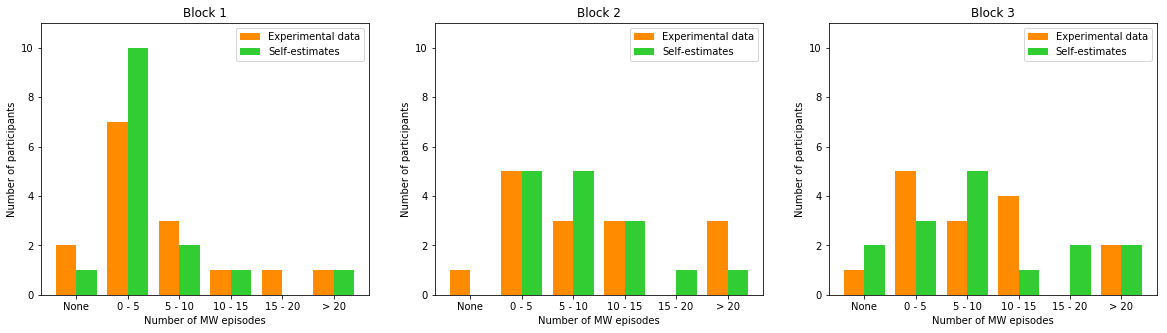

In [35]:
xticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
xlabels = ['None', '0 - 5', '5 - 10', '10 - 15', '15 - 20', '> 20']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Block 1
axes[0].hist([mw_episodes['Bin1'], survey['Bin1']], bins=range(0,7), color=['darkorange', 'limegreen'], label=['Experimental data', 'Self-estimates'])
axes[0].set(xlabel='Number of MW episodes', ylabel='Number of participants', xticks=xticks, xticklabels=xlabels, ylim=[0,11], title='Block 1')
axes[0].legend()

# Block 2
axes[1].hist([mw_episodes['Bin2'], survey['Bin2']], bins=range(0,7), color=['darkorange', 'limegreen'], label=['Experimental data', 'Self-estimates'])
axes[1].set(xlabel='Number of MW episodes', ylabel='Number of participants', xticks=xticks, xticklabels=xlabels, ylim=[0,11], title='Block 2')
axes[1].legend()

# Block 3
axes[2].hist([mw_episodes['Bin3'], survey['Bin3']], bins=range(0,7), color=['darkorange', 'limegreen'], label=['Experimental data', 'Self-estimates'])
axes[2].set(xlabel='Number of MW episodes', ylabel='Number of participants', xticks=xticks, xticklabels=xlabels, ylim=[0,11], title='Block 3')
axes[2].legend()

plt.show()
fig.savefig('./Figures/Behav1_MW_episodes.svg')

<div class="alert alert-block alert-info">
    One can see that there is <b>no</b> evidence of a general tendency to over- or underestimate the number of mind wandering episodes in retrospect.
</div>

## How much do people mind wander?
In the questionnaire participants were asked to judge how much of their daily wake time they spent mind wandering on average over the last couple of weeks. Do the total number of mind wandering episodes during the experiment, i. e. the sum of mind wandering episodes over all three blocks, correlate with participant's self-estimation of their daily mind wandering time?

*Note:* Documentation [statsmodel OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) and [why sm.add_constant](https://realpython.com/linear-regression-in-python/#implementing-linear-regression-in-python) has to be called.

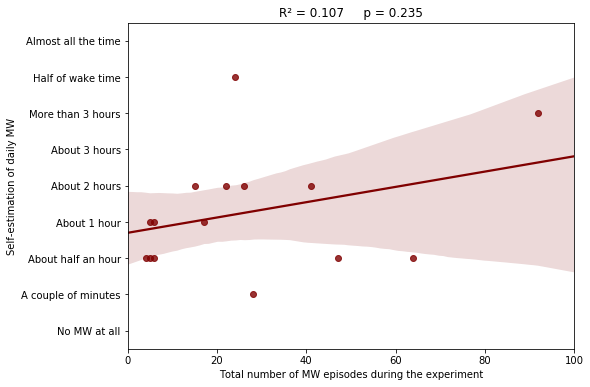

                            OLS Regression Results                            
Dep. Variable:                DailyMW   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.554
Date:                Sat, 07 Mar 2020   Prob (F-statistic):              0.235
Time:                        12:44:11   Log-Likelihood:                -27.195
No. Observations:                  15   AIC:                             58.39
Df Residuals:                      13   BIC:                             59.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7009      0.613      4.410      0.0

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [36]:
# Regression Plot
ylabels = ['No MW at all', 'A couple of minutes', 'About half an hour', 'About 1 hour', 'About 2 hours', 'About 3 hours', 'More than 3 hours', 'Half of wake time', 'Almost all the time']
fig, axes = plt.subplots(figsize=(8,6))
axes.set(xlim=[0,100], ylim=[-0.5,8.5], yticks=[0,1,2,3,4,5,6,7,8], yticklabels=ylabels)
sns.regplot(x=mw_episodes['Total'], y=survey['DailyMW'], color='maroon', ax=axes)
axes.set(xlabel='Total number of MW episodes during the experiment', ylabel='Self-estimation of daily MW', title="{}\u00b2 = 0.107     p = 0.235".format('R'))
plt.show()
fig.savefig('./Figures/Behav2_regression.svg')

# Linear regression using statsmodel
results = sm.OLS(survey['DailyMW'], sm.add_constant(mw_episodes['Total'])).fit()
print(results.summary())

<div class="alert alert-block alert-info">
    There is <b>no signifcant correleation $(p>0.05, R^2=0.1)$</b> between the total number of mind wandering episodes in the experiment and self-estimates of daily mind wandering. Critically, it can be questioned whether self-estimations of daily mind wandering time are accurate. Presumably, participants spent more of their wake time mind wandering than they indicated, people might not be aware of it (refer to literature). Thus, one cannot infer in how far occurrences of mind wandering episodes in the experiment are a suitable predictor of mind wandering frequency in daily life. Experimental approaches like experience sampling would be a more promising approach to answer such questions (again, refer to the literature).
</div>

## Attitude towards mind wandering
In the questionnaire, participants are confronted with different statements about mind wandering. Participants are asked to indicate how much they agree or disagree with the following statements:

**Positive statements:**
* "I enjoy mind wandering."
* "Mind wandering has a positive effect on my psychological wellbeing."
* "Mind wandering helps me with future planning."
* "Mind wandering is boosting my creativity."

**Negative statements:**
* "I would like to mind wander less."
* "Mind wandering hinders me to live in the present."
* "I fell better if I spent less of my wake time mind wandering."

**Neutral statements:**
* "The way I experience mind wandering depends on the content and the context of my mind wondering episodes."
* "Mind wandering is an important component of my conscious experience."

Agreement or disagreement to those statements is rated on a five-point **Likert scale**, the following options are given:
* "I agree"
* "I somewhat agree"
* "I don't have an opinion on that"
* "I somewhat disagree"
* "I disagree"

For the following analysis, only statements belonging to the categories *positive* and *negative* are taken into account. Likert-scale answers are transformed to a numerical rating scale ranging from $[-1,1]$. For positive statements $+1$ corresponds to the answer "I agree", for negative statements $+1$ corresponds to the answer "I disagree". Finally, all ratings for positive and negative statements are summed up and dived by the number of statements, resulting in an indicator of participant's attitude towards mind wandering. A mind wandering attitude of $0$ can be considered as neutral, $+1$ denotes a very positive perspective on mind wandering and $-1$ indicates a very negative perspective on mind wandering.

First of all, the boxplot illustrates the attitude of the present sample towards mind wandering. Second, we investigate in how far the attitude towards mind wandering depends on the amount of mind wandering episodes in the experiment. To be more specific, we want to know if participants are biased in their mind wandering habits in a way that more frequent mind wandering correlates with a more optimistic or more critical perspective on the phenomenon itself.

In [37]:
# Transform Likert-scale answer to a numerical scale ranging from [-1,1]
def mw_attitude(opinions, positive=True):
    attitude = []
    factor = 1
    if not positive:
        factor = -1
    for opinion in opinions:
        if opinion == 'I agree':
            attitude.append(1*factor)
        elif opinion == 'I somewhat agree':
            attitude.append(0.5*factor)
        elif opinion == "I don't have an opinion on that":
            attitude.append(0)
        elif opinion == 'I somewhat disagree':
            attitude.append(-0.5*factor)
        elif opinion == 'I disagree':
            attitude.append(-1*factor)
    return pd.Series(attitude)

# Positive statements have odd indices in the data frame.
# Negative statemens have even indices in the data frame.
for index in range(5,12):
    survey['Q' + str(index)] = mw_attitude(survey.iloc[:,index], positive=(index%2 != 0))

# Calculate Mind Wandering attitude index
survey['AttitudeMW'] = np.around((survey['Q5'] + survey['Q6'] + survey['Q7'] + survey['Q8'] + survey['Q9'] + survey['Q10'] + survey['Q11']) / 7, 2)

survey.head()

,Participant ID:,Please estimate how many mind wandering episodes you experienced in the *first* block of the experiment.,Please estimate how many mind wandering episodes you experienced in the *second* block of the experiment.,Please estimate how many mind wandering episodes you experienced in the *third* block of the experiment.,Please estimate how much of your daily wake time you spent mind wandering on average over the last couple of weeks. Try to accumulate all the mind wandering episodes of one day.,"""I enjoy mind wandering.""","""I would like to mind wander less.""","""Mind wandering has a positive effect on my psychological wellbeing.""","""Mind wandering hinders me to live in the present.""","""Mind wandering helps me with future planning.""",...,Bin3,DailyMW,Q5,Q6,Q7,Q8,Q9,Q10,Q11,AttitudeMW
0,sub1,none,0 - 5,5 - 10,About two hours per day,I don't have an opinion on that,I don't have an opinion on that,I agree,I somewhat disagree,I somewhat disagree,...,2,4,0.0,0.0,1.0,0.5,-0.5,1.0,0.0,0.29
1,sub2,0 - 5,5 - 10,15 - 20,About half an hour per day,I somewhat agree,I agree,I somewhat agree,I agree,I somewhat agree,...,4,2,0.5,-1.0,0.5,-1.0,0.5,-1.0,0.5,-0.14
2,sub3,10 - 15,15 - 20,more than 20,A couple of minutes per day,I agree,I disagree,I don't have an opinion on that,I disagree,I somewhat disagree,...,5,1,1.0,1.0,0.0,1.0,-0.5,1.0,0.5,0.57
3,sub4,0 - 5,0 - 5,5 - 10,About two hours per day,I agree,I somewhat agree,I don't have an opinion on that,I don't have an opinion on that,I somewhat agree,...,2,4,1.0,-0.5,0.0,0.0,0.5,0.0,0.5,0.21
4,sub5,0 - 5,5 - 10,5 - 10,About two hours per day,I somewhat agree,I somewhat agree,I don't have an opinion on that,I agree,I agree,...,2,4,0.5,-0.5,0.0,-1.0,1.0,0.0,1.0,0.14


0.334
Ttest_1sampResult(statistic=3.750160884071654, pvalue=0.0021527024067954726)


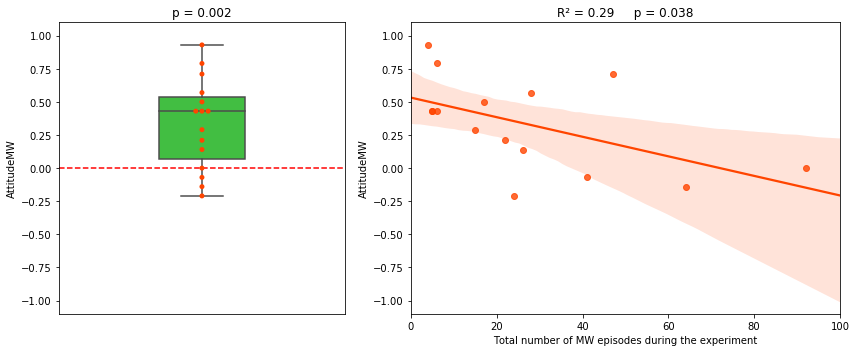

                            OLS Regression Results                            
Dep. Variable:             AttitudeMW   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     5.305
Date:                Sat, 07 Mar 2020   Prob (F-statistic):             0.0384
Time:                        12:44:11   Log-Likelihood:                -2.2341
No. Observations:                  15   AIC:                             8.468
Df Residuals:                      13   BIC:                             9.884
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5320      0.116      4.586      0.0

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), gridspec_kw={'width_ratios':[1,1.5]})

# Boxplot
sns.boxplot(survey['AttitudeMW'], orient='v', color='limegreen', saturation=0.8, width=0.3, ax=axes[0])
sns.swarmplot(survey['AttitudeMW'], orient='v', color='orangered', ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set(ylim=[-1.1,1.1], xticks=[], title='p = 0.002')

# T-test testing for significance of mind wandering attitude against a neutral attitude of 0.0
print(np.mean(survey['AttitudeMW']))
print(st.ttest_1samp(survey['AttitudeMW'], 0.0))


# Regression Plot
axes[1].set(ylim=[-1.1,1.1], xlim=[0,100])
sns.regplot(x=mw_episodes['Total'], y=survey['AttitudeMW'], color='orangered', ax=axes[1])
axes[1].set(xlabel='Total number of MW episodes during the experiment', title="{}\u00b2 = 0.29     p = 0.038".format('R'))

fig.tight_layout()
plt.show()
fig.savefig('./Figures/Behav3_MW_attitude.svg')

# Linear regression using statsmodel
results = sm.OLS(survey['AttitudeMW'], sm.add_constant(mw_episodes['Total'])).fit()
print(results.summary())

<div class="alert alert-block alert-info">
    In general, the present sample shows a <b>predominantly positive attitude towards mind wandering</b>. <br>
    There is a <b> significant correlation $(p<0.05)$</b> between the total number of mind wandering episodes in the experiment and participant's attitude towards mind wandering as inferred from the questionnaire. However, the negative relationship between the amount of mind wandering episodes in the experiment and mind wandering attitude is fairly moderate $(R^2=0.3)$.
</div>

## First person accounts
At the end of the questionnaire participants were asked to provide a free text answer about how they experienced mind wandering episodes during the experiment. Reviewing those free text answers revealed a couple of interesting insights:
* Some participants report to be able to keep track of their breath count while they are mind wandering, at least for a short time.
* Participants describe 3 distinct stages in the transitions breath focus to mind wandering:
    1. Task focus (breath focus)
    2. Counting and mind wandering simultaneously
    3. Mind wandering only, completely distracted from the task
* Mind wandering is compared to the moment of falling asleep ("relaxing", "calm").
* Meta awareness is described as waking up from a (nice) dream and regretting to wake up.
* Mind wandering itself is perceived as pleasant, the realization that one is mind wandering and has lost track of the task is perceived as unpleasant though.
* Some participants characterize mind wandering as a loss of control and therefore perceive mind wandering as unpleasant.
* Most of the content of mind wandering episodes is about daily concerns like university, what to eat, making plans for the rest of the day or reflecting on recent conversations with other people.
* The experiment made participants feel tired.


The following word cloud illustrates a few linguistic commonalities in the free text answers:
![Word Cloud](./Figures/wordcloudMWexperience.png)

<div class="alert alert-block alert-info">
    There seems to be a general trend in how participants experience mind wandering: <b>Mind wandering episodes as such are perceived as pleasant but meta awareness is perceived as unpleasant</b>. Participants like to refer to a sleep analogy: It is nice to dream until you (have to) wake up.
</div>